# Plot some Survival curves


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import LogNorm
#import scipy.sparse.linalg as sla

from scipy.integrate import odeint


sns.set_context("talk", font_scale=1.4)

from lifelines import KaplanMeierFitter




In [2]:
# load the inferred transition matrix
P_allCountries_Bayes = np.genfromtxt('./../results/transitionBayesAllCountries.csv')

### Simulation of Markov chains

In [3]:
# function for computing hitting times of random walks
def computeHittingTime(transitionMatrix,initialCondition,hittingTarget,rel):
    
    n=transitionMatrix.shape[0] # number of states
    
    hittingTimes = np.zeros(rel)
    
    # go over realisations
    for r in np.arange(rel):
        t=0
        oldstate = initialCondition # we start at the initial condition
        while ((oldstate in hittingTarget) == False):
            t=t+1
            newstate = np.random.choice(np.arange(n), p=transitionMatrix[oldstate,:])
            oldstate = newstate
        # save the number of steps needed
        hittingTimes[r] = t
    return(hittingTimes)  

The simulation of $10^5$ Markov chains takes a couple of minutes on commodity hardware.

In [4]:
# time until democracy (i.e., hitting time from -10 to >0)
hTimesDemocracy = computeHittingTime(P_allCountries_Bayes,0,np.arange(10,22),10**5)

In [5]:
# life time of democracy (i.e., hitting time from full democracy to <0)
hTimesAutocracy = computeHittingTime(P_allCountries_Bayes,20,np.arange(0,10),10**5)

# plotting survival curves

In [7]:
kmf = KaplanMeierFitter()
kmf.fit(hTimesDemocracy,label='survival autocracies') 

kmf_Autocracy = KaplanMeierFitter()
kmf_Autocracy.fit(hTimesAutocracy,label='survival democracies') 

<lifelines.KaplanMeierFitter:"survival democracies", fitted with 100000 total observations, 0 right-censored observations>

In [8]:
tVec = np.arange(0,2000)
survivalFunctionDemocracy = kmf_Autocracy.survival_function_at_times(times=tVec)
survivalFunctionAutocracy = kmf.survival_function_at_times(times=tVec)

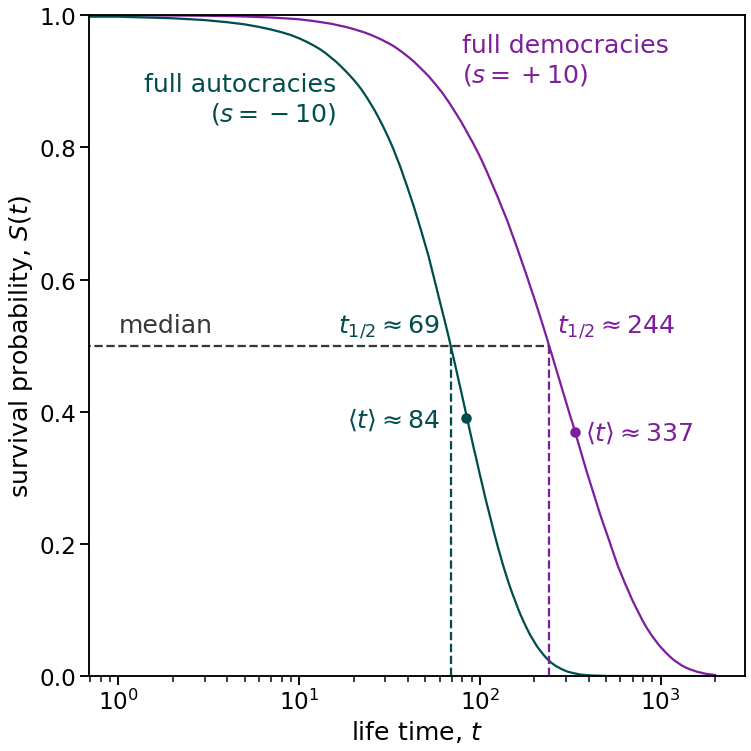

In [49]:
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(1, 1, 1)
plt.plot(survivalFunctionDemocracy,color=sns.xkcd_rgb['purple'])
plt.plot(survivalFunctionAutocracy,color=sns.xkcd_rgb['dark teal'])
ax.set_xscale('log')

plt.text(x=16,y=0.84,s=r'full autocracies' '\n' '($s=-10$)',color=sns.xkcd_rgb['dark teal'],ha='right')
plt.text(x=80,y=0.9,s=r'full democracies' '\n' '($s=+10$)',color=sns.xkcd_rgb['purple'])

# insert median survival 
medianSurvivalDemocracy =  np.where(survivalFunctionDemocracy<0.5)[0][0]
medianSurvivalAutocracy =  np.where(survivalFunctionAutocracy<0.5)[0][0]

plt.plot([medianSurvivalDemocracy,medianSurvivalDemocracy],[0,survivalFunctionDemocracy[medianSurvivalDemocracy]],linestyle='--',color=sns.xkcd_rgb['purple'])
plt.plot([medianSurvivalAutocracy,medianSurvivalAutocracy],[0,survivalFunctionAutocracy[medianSurvivalAutocracy]],linestyle='--',color=sns.xkcd_rgb['dark teal'])
plt.plot([0,medianSurvivalDemocracy],[0.5,0.5],linestyle='--',color=sns.xkcd_rgb['dark grey'])

plt.text(1,0.52, r'median',color=sns.xkcd_rgb['dark grey'])

plt.text(267,0.52, r'$t_{1/2}\approx 244$',color=sns.xkcd_rgb['purple'])
plt.text(60,0.52, r'$t_{1/2}\approx 69$',color=sns.xkcd_rgb['dark teal'],ha='right')
plt.ylim([0,1])

# add analytical expression of the mean life time
plt.scatter(337,0.37,color=sns.xkcd_rgb['purple'])
plt.text(380,0.37,r'$\langle t \rangle\approx 337$',va='center',color=sns.xkcd_rgb['purple'])


plt.scatter(84,0.39,color=sns.xkcd_rgb['dark teal'])
plt.text(60,0.39,r'$\langle t \rangle \approx 84$',ha='right',va='center',color=sns.xkcd_rgb['dark teal'])


plt.xlabel('life time, $t$')
plt.ylabel('survival probability, $S(t)$')



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('./../results/figures/Fig6-survivalCurves.pdf')


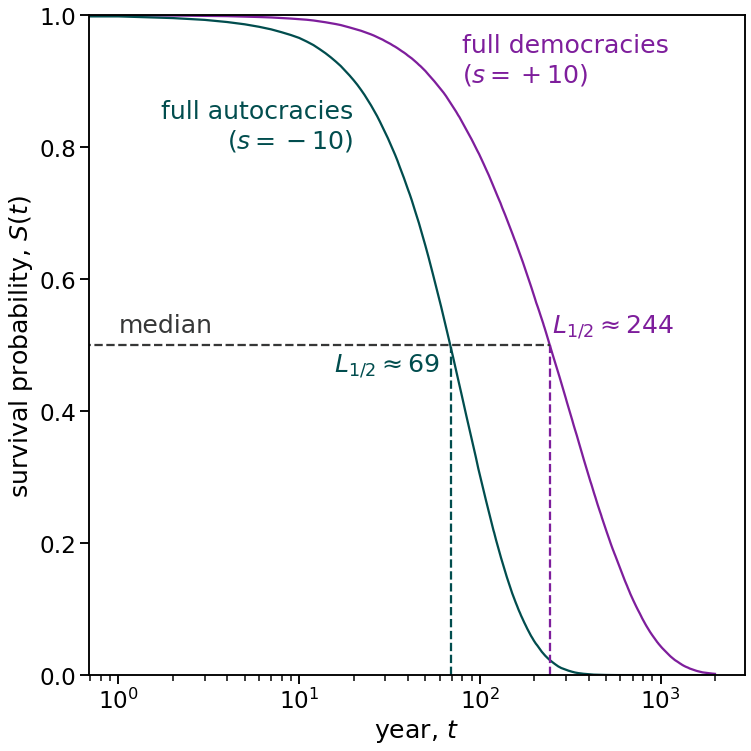

In [122]:
# fig = plt.figure(figsize=(11,11))
# ax = fig.add_subplot(1, 1, 1)
# plt.plot(survivalFunctionDemocracy,color=sns.xkcd_rgb['purple'])
# plt.plot(survivalFunctionAutocracy,color=sns.xkcd_rgb['dark teal'])
# ax.set_xscale('log')

# #plt.text(x=1,y=0.8,s=r'full autocracies ($s=-10$)',color=sns.xkcd_rgb['green'])
# plt.text(x=20,y=0.8,s=r'full autocracies' '\n' '($s=-10$)',color=sns.xkcd_rgb['dark teal'],ha='right')
# plt.text(x=80,y=0.9,s=r'full democracies' '\n' '($s=+10$)',color=sns.xkcd_rgb['purple'])

# # insert median survival 
# medianSurvivalDemocracy =  np.where(survivalFunctionDemocracy<0.5)[0][0]
# medianSurvivalAutocracy =  np.where(survivalFunctionAutocracy<0.5)[0][0]

# plt.plot([medianSurvivalDemocracy,medianSurvivalDemocracy],[0,survivalFunctionDemocracy[medianSurvivalDemocracy]],linestyle='--',color=sns.xkcd_rgb['purple'])
# plt.plot([medianSurvivalAutocracy,medianSurvivalAutocracy],[0,survivalFunctionAutocracy[medianSurvivalAutocracy]],linestyle='--',color=sns.xkcd_rgb['dark teal'])
# plt.plot([0,medianSurvivalDemocracy],[0.5,0.5],linestyle='--',color=sns.xkcd_rgb['dark grey'])

# plt.text(1,0.52, r'median',color=sns.xkcd_rgb['dark grey'])

# plt.text(250,0.52, r'$L_{1/2}\approx 244$',color=sns.xkcd_rgb['purple'])
# plt.text(60,0.46, r'$L_{1/2}\approx 69$',color=sns.xkcd_rgb['dark teal'],ha='right')
# plt.ylim([0,1])

# plt.xlabel('year, $t$')
# plt.ylabel('survival probability, $S(t)$')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig('./figures/survivalCurveRegimes.pdf')

In [14]:
medianSurvivalDemocracy =  np.where(survivalFunctionDemocracy<0.5)[0][0]
medianSurvivalAutocracy =  np.where(survivalFunctionAutocracy<0.5)[0][0]

In [15]:
medianSurvivalDemocracy

243

In [16]:
medianSurvivalAutocracy

69

In [123]:
democracy001 =  np.where(survivalFunctionDemocracy<0.01)[0][0]
autocracy001 =  np.where(survivalFunctionAutocracy<0.01)[0][0]

In [124]:
democracy001

1450

In [125]:
autocracy001

287

### Standard deviations

In [24]:
np.std(hTimesDemocracy)

61.554454640033164

In [25]:
np.std(hTimesAutocracy)

310.256849520842

In [26]:
np.median(hTimesDemocracy)

69.0

In [27]:
np.median(hTimesAutocracy)

243.0

In [28]:
np.mean(hTimesDemocracy)

83.77791

In [29]:
np.mean(hTimesAutocracy)

336.50504